In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None)

!nvidia-smi

Tue Sep 24 04:09:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
data.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
print(data)

           0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28 

Number of columns in data: 31
Length of column_names list: 33


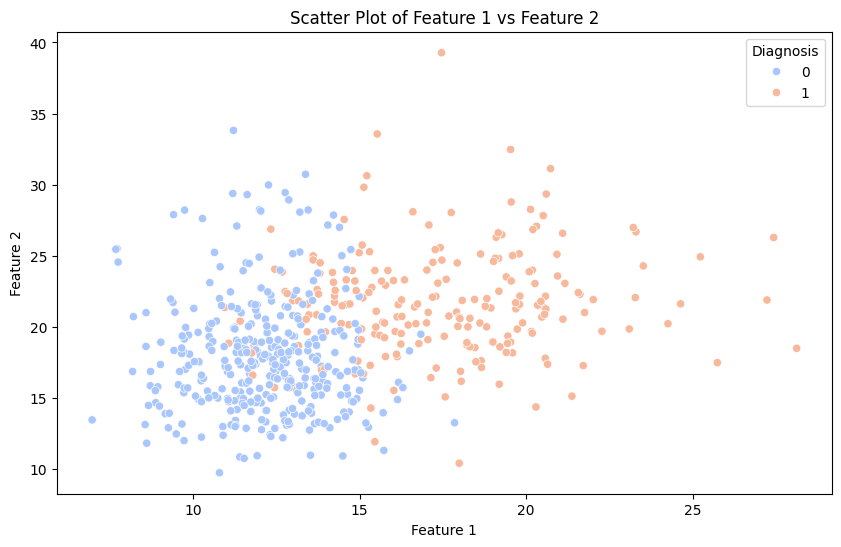

In [28]:
print(f"Number of columns in data: {data.shape[1]}")
print(f"Length of column_names list: {len(column_names)}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Feature_1', y='Feature_2', hue='Diagnosis', palette='coolwarm')

plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression


In [17]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print( "Accuracy :", accuracy)


Accuracy : 0.9736842105263158


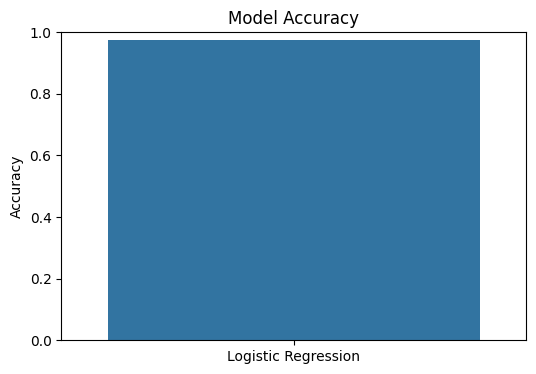

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Logistic Regression'], y=[accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()